In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [3]:
data = pd.read_csv("/kaggle/input/restaurant-data/Dataset .csv")
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [29]:
original_data = pd.read_csv("/kaggle/input/restaurant-data/Dataset .csv")
original_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
data.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
cat_col = data.select_dtypes(['object']).columns.tolist()
cat_col

['Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text']

In [8]:
unused_col = ['City','Address','Locality','Locality Verbose','Cuisines','Currency','Has Table booking','Has Online delivery','Is delivering now','Switch to order menu']
data = data.drop(unused_col,axis = 1)

In [9]:
data = data.drop('Restaurant Name',axis = 1)

In [10]:
used_col = ['Rating color','Rating text']

In [11]:
encoder = OneHotEncoder(sparse_output = False)

ohe = encoder.fit_transform(data[used_col])

In [12]:
one_hot = pd.DataFrame(ohe, columns=encoder.get_feature_names_out(used_col))

en_data = pd.concat([data, one_hot], axis = 1)
en_data = en_data.drop(used_col, axis=1)
en_data.head()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Rating color_Dark Green,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_White,Rating color_Yellow,Rating text_Average,Rating text_Excellent,Rating text_Good,Rating text_Not rated,Rating text_Poor,Rating text_Very Good
0,6317637,162,121.027535,14.565443,1100,3,4.8,314,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,6304287,162,121.014101,14.553708,1200,3,4.5,591,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,6300002,162,121.056831,14.581404,4000,4,4.4,270,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,6318506,162,121.056475,14.585318,1500,4,4.9,365,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,6314302,162,121.057508,14.584450,1500,4,4.8,229,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [13]:
co_rel = en_data.corr(method='kendall')

<Axes: >

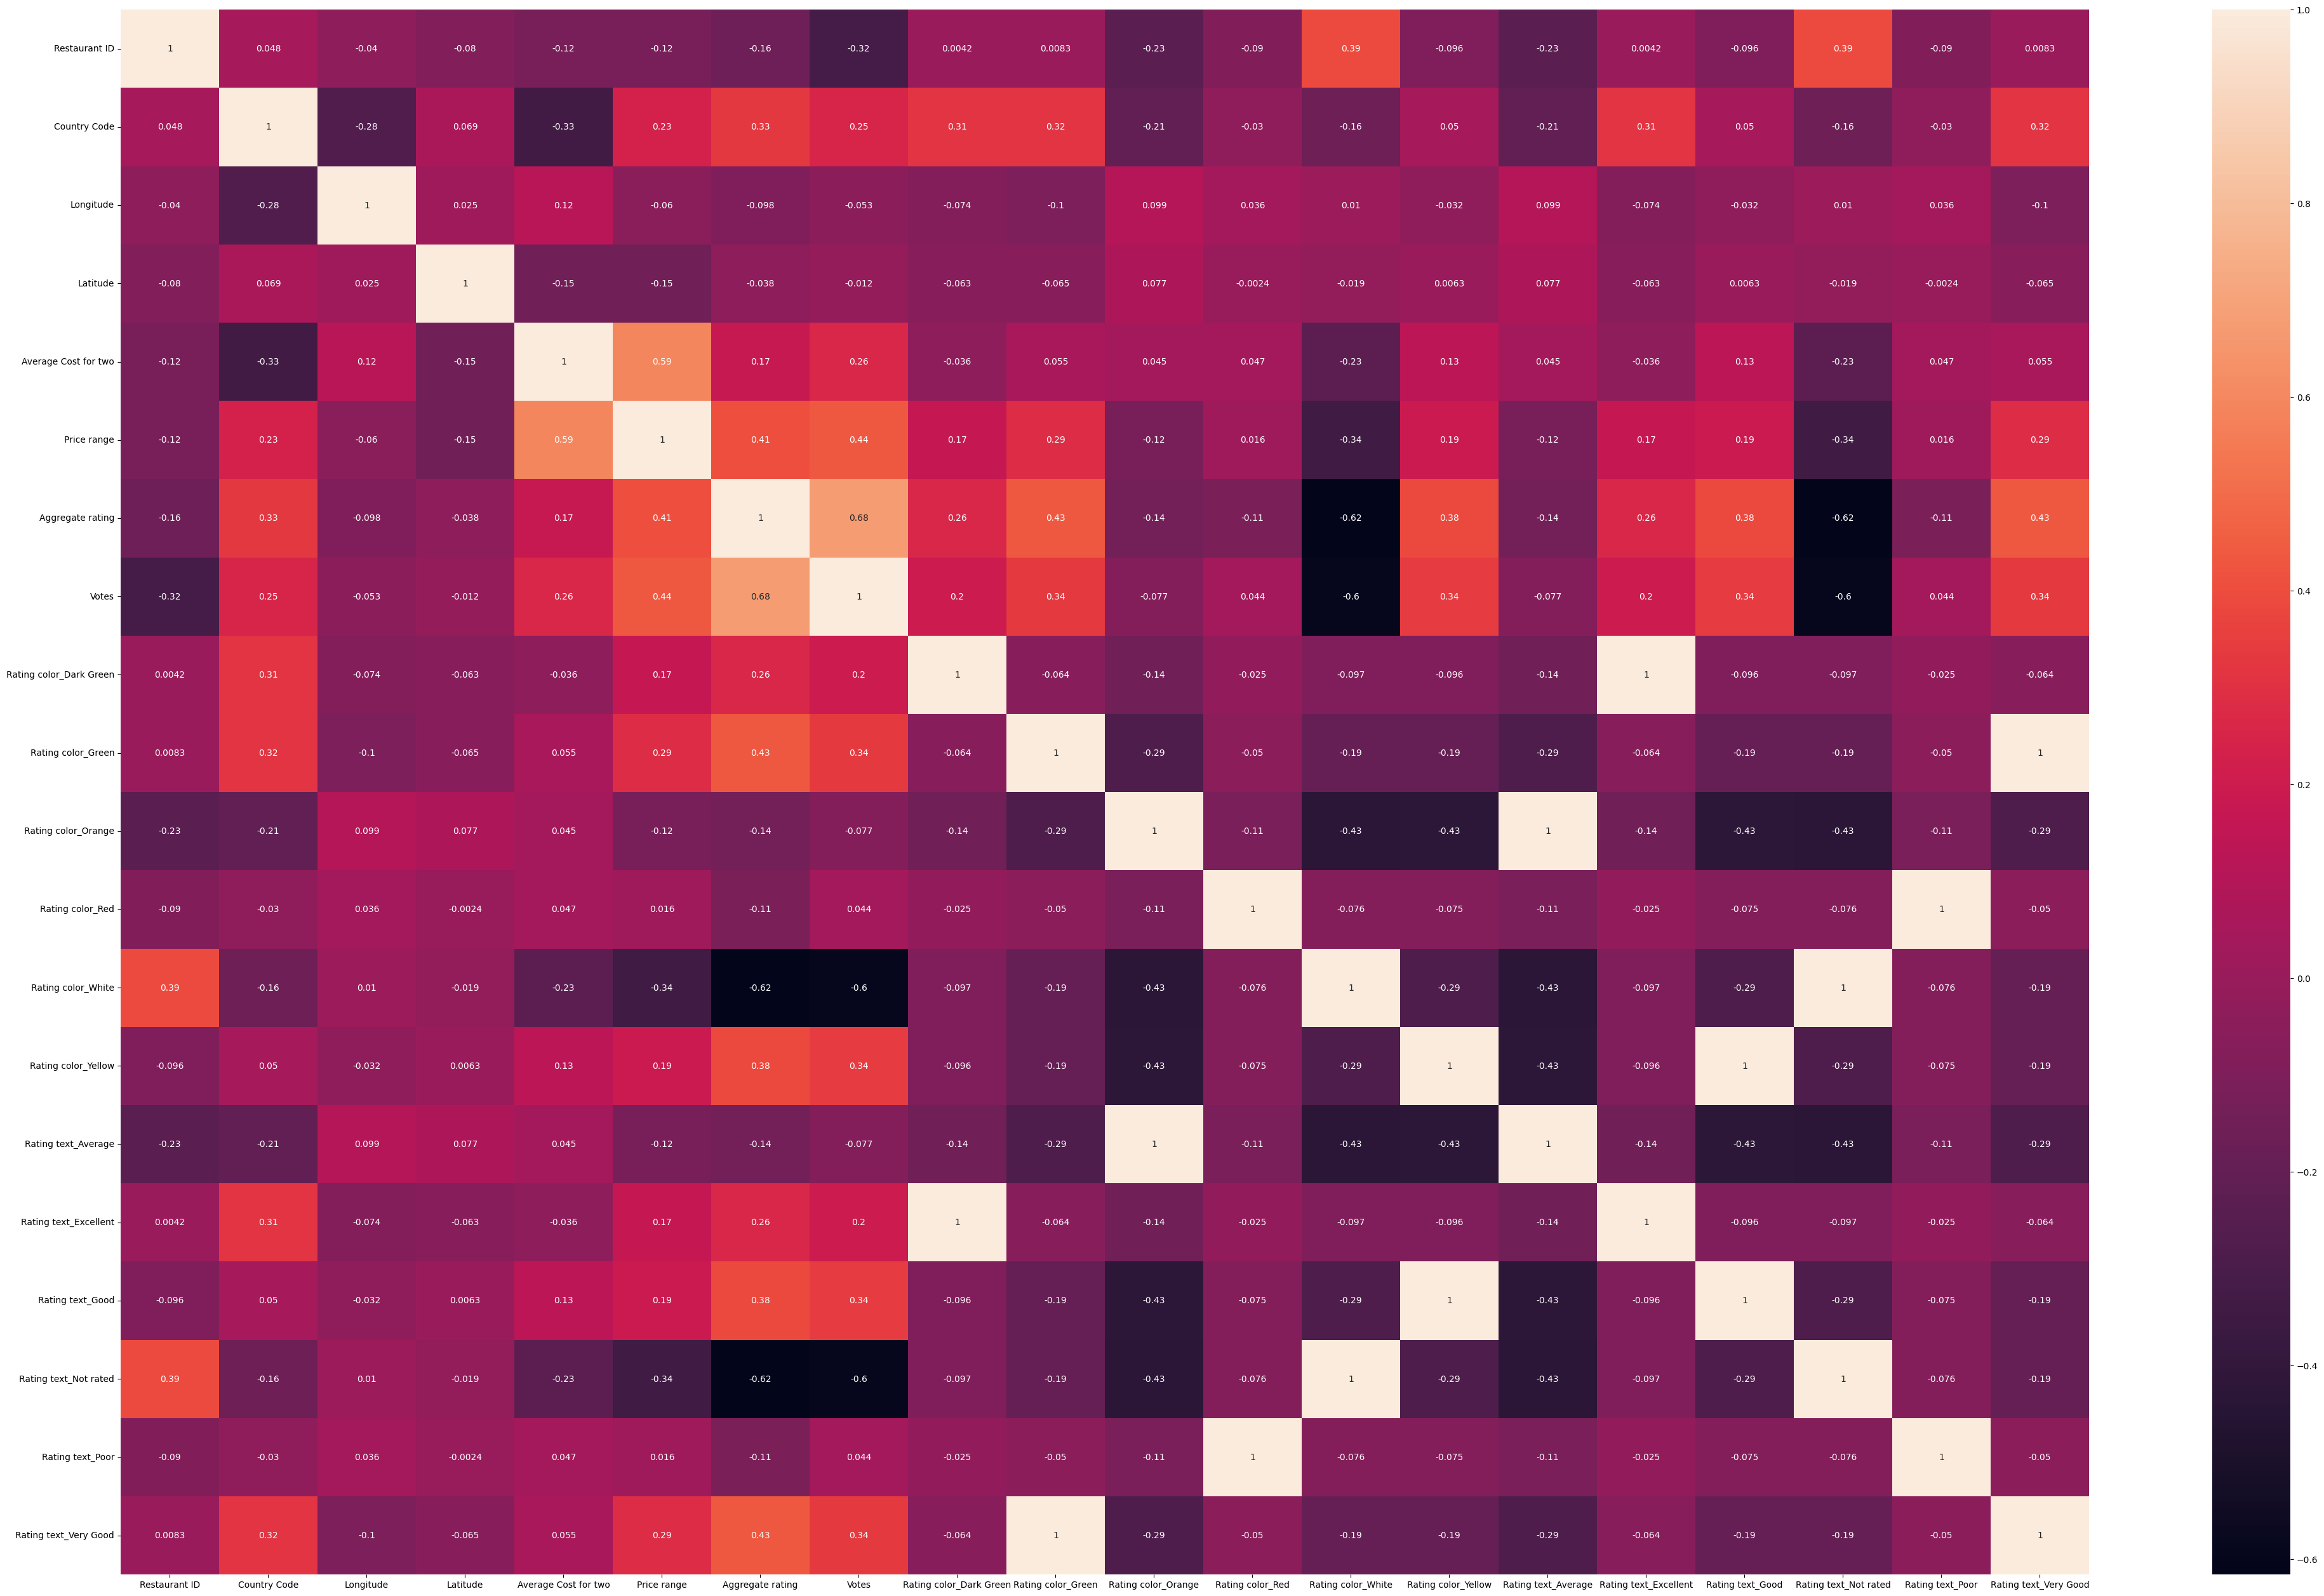

In [14]:
plt.figure(figsize = (50,32))
sns.heatmap(co_rel, annot = True)

In [15]:
x = en_data.iloc[:,[4,5,7,8,9,10,11,12,13,14,15,16,17,18,19]]
y = en_data['Aggregate rating']

In [16]:
x.head()

,Average Cost for two,Price range,Votes,Rating color_Dark Green,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_White,Rating color_Yellow,Rating text_Average,Rating text_Excellent,Rating text_Good,Rating text_Not rated,Rating text_Poor,Rating text_Very Good
0,1100,3,314,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1200,3,591,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,4000,4,270,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1500,4,365,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1500,4,229,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 353)

In [18]:
y_train.head()

8696    0.0
1164    4.0
4824    3.2
7574    3.2
2961    2.3
Name: Aggregate rating, dtype: float64

In [19]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [45]:
y_pred = regression.predict(x_test)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.033487765781181504
R-squared: 0.9863979044697203


In [21]:
decision_tree = DecisionTreeRegressor(min_samples_leaf = 0.01)
decision_tree.fit(x_train,y_train)

DecisionTreeRegressor(min_samples_leaf=0.01)

In [46]:
y_pred = decision_tree.predict(x_test)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.03268959194481477
R-squared: 0.986722107548629


In [23]:
random_forest = RandomForestRegressor(n_estimators = 5,random_state = 353, min_samples_leaf = .01)
random_forest.fit(x_train,y_train)

RandomForestRegressor(min_samples_leaf=0.01, n_estimators=5, random_state=353)

In [47]:
y_pred = random_forest.predict(x_test)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.031644079594785074
R-squared: 0.9871467748422345


In [38]:
y_test.head(10)

8963    3.4
44      4.7
9333    4.2
8288    3.1
648     4.3
6410    3.4
2312    4.1
4807    0.0
56      4.2
6708    4.0
Name: Aggregate rating, dtype: float64

In [42]:
print(y_pred[:10])

[3.06798336 4.65611332 4.16790033 3.07324606 4.20354801 3.15400151
 4.18216943 0.         4.15517306 4.15082066]


Text(0.5, 1.0, 'No. of restaurants in a Location')

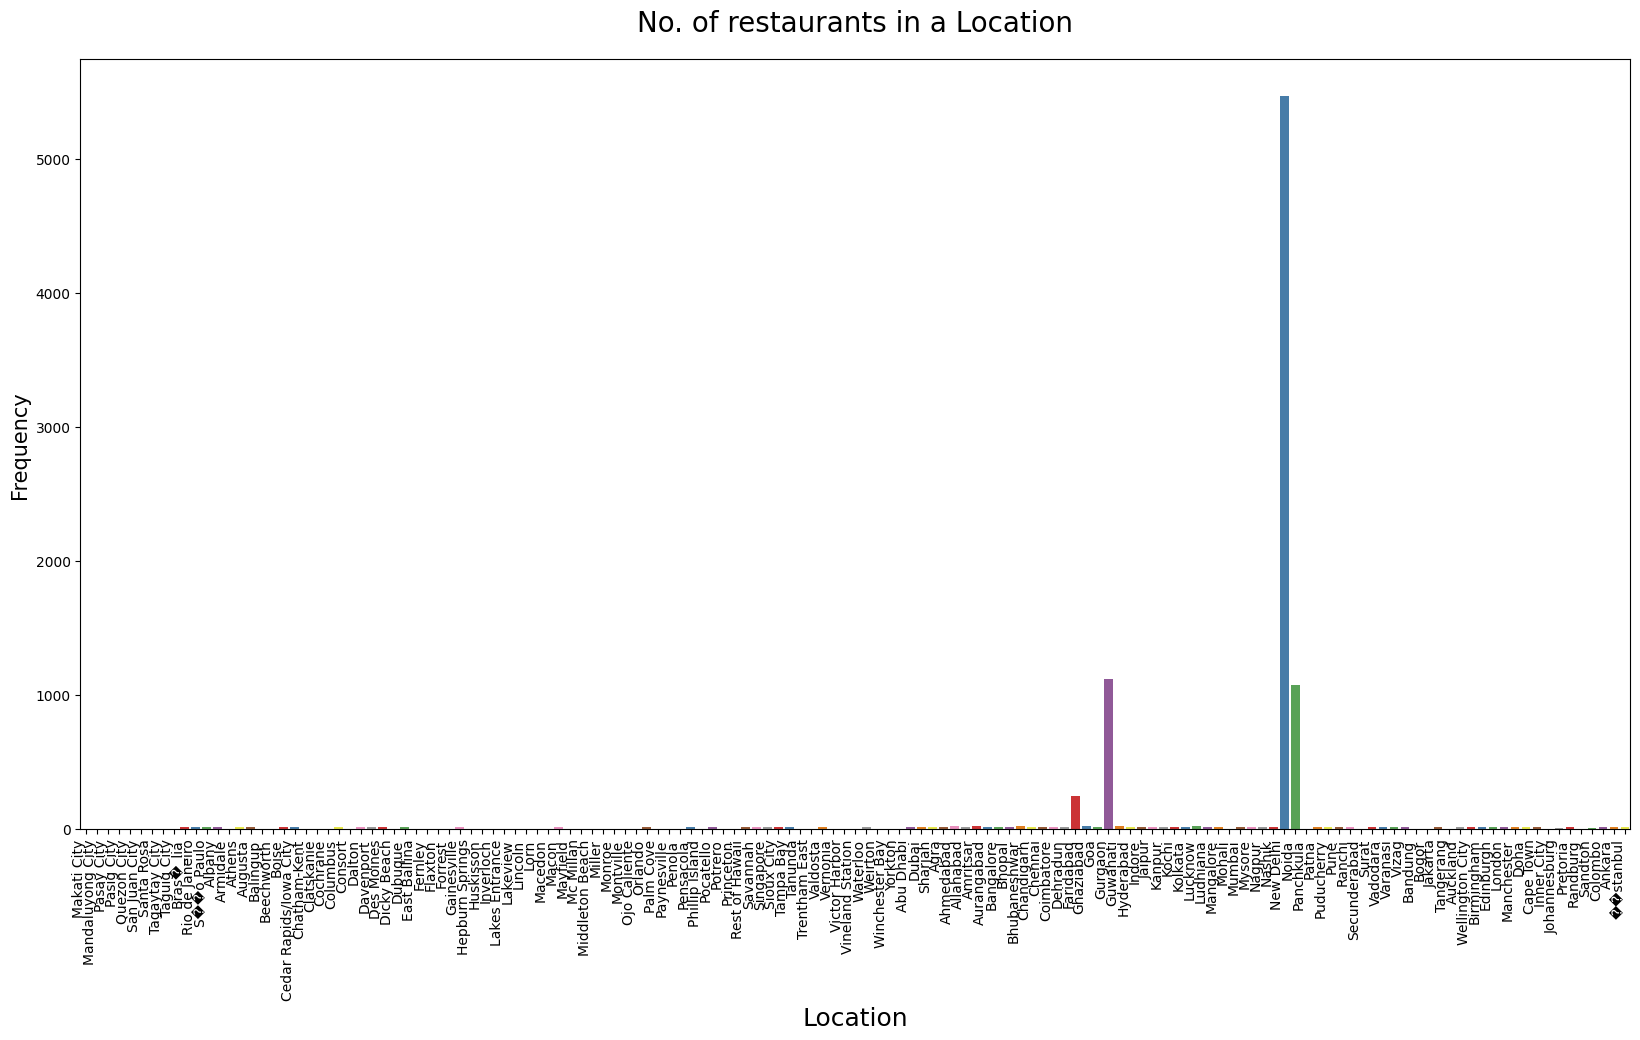

In [31]:
fig = plt.figure(figsize=(20,10))
loc = sns.countplot(x = "City",data = original_data,palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation = 90, ha = "right")
plt.ylabel("Frequency",size = 15)
plt.xlabel("Location",size = 18)
loc
plt.title('No. of restaurants in a Location',size = 20,pad=20)

Text(0.5, 0, 'Number of outlets')

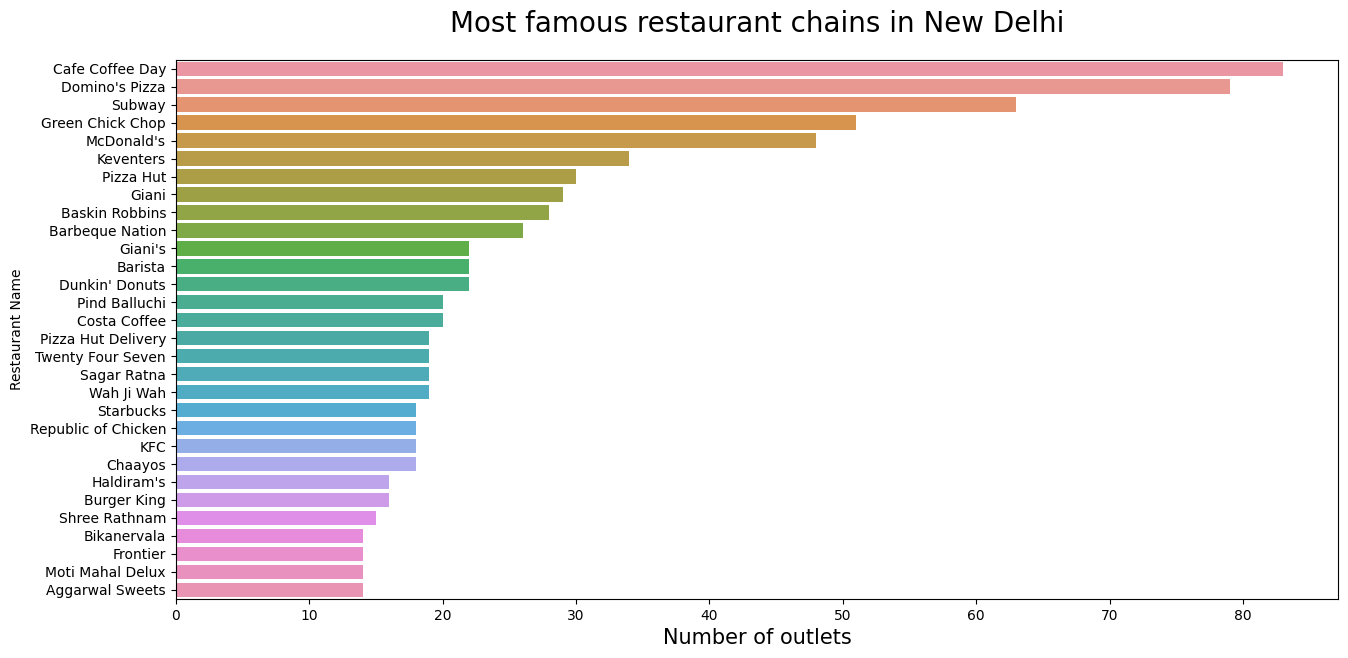

In [34]:
fig = plt.figure(figsize=(15,7))
chains = original_data['Restaurant Name'].value_counts()[:30]
sns.barplot(x = chains, y = chains.index)
plt.title("Most famous restaurant chainsbb in New Delhi",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)